# ТВиМС Задание 4

## Вариант 14

Проверка статистических гипотез.
Критерии согласия Пирсона, Колмогорова, Мизеса.

In [1]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt

import base
import hist
import chi_test
import kolmogorov_test
import mises_test
import taskdata


In [2]:
from ipywidgets import interact
plt.rcParams['figure.figsize'] = [12, 8]

***

### Критерий согласия Пирсона

In [3]:
def get_chisq(n, m=None):
    vs = base.generate_varseries(taskdata.get_y, n)
    return chi_test.chi_squared(taskdata.y_a,
                                taskdata.y_b,
                                vs,
                                taskdata.Fy_deduced,
                                bincount=m)

In [4]:
# test chi_squared 20 times

for i in range(20):
    c = get_chisq(200, 4)
    print(c)

2.8755331608803822
2.8892953568203597
1.2063683505588676
1.6251859841400735
2.9836672332048986
5.151792998581587
0.8279948981520233
3.8537969006888786
8.117827114908414
0.6017956789333195
1.3152318613473977
0.49505474617791634
1.5181076958780542
4.892343288849769
7.907407322158605
1.0911551392188426
4.145412178401892
4.587354160242789
0.4335539404125202
1.9386690710067906


In [5]:
# helper funcs:
def chi_prob_of_not_exceeding_criticals(n, alphas, sample_num, m=None):
    if not m:
        m = math.floor(np.cbrt(n))

    answers = [0]*len(alphas)
    
    for _ in range(sample_num):
        c = get_chisq(n, m)
        for (i, alpha) in enumerate(alphas):
            if c < chi_test.chi_critical(alpha, m-1):
                answers[i] += 1

    for i in range(len(answers)):
        answers[i] /= sample_num

    return answers


def print_chi_stuff(sample_num, n, m):
    print(f'n = {n}; m = {m}')

    answers = chi_prob_of_not_exceeding_criticals(n, [0.10, 0.05, 0.01], sample_num, m=m)
    print(f'Observed chi squared is less than xi squared 0.90 in {answers[0]*100}% of {sample_num} cases.')
    print(f'Observed chi squared is less than xi squared 0.95 in {answers[1]*100}% of {sample_num} cases.')
    print(f'Observed chi squared is less than xi squared 0.99 in {answers[2]*100}% of {sample_num} cases.')


print_chi_stuff(1_000, 200, 5)
print('')
print_chi_stuff(1_000, 1_000, 10)
print('')
print_chi_stuff(1_000, 8_000, 20)

n = 200; m = 5
Observed chi squared is less than xi squared 0.90 in 88.9% of 1000 cases.
Observed chi squared is less than xi squared 0.95 in 94.8% of 1000 cases.
Observed chi squared is less than xi squared 0.99 in 98.8% of 1000 cases.

n = 1000; m = 10
Observed chi squared is less than xi squared 0.90 in 89.5% of 1000 cases.
Observed chi squared is less than xi squared 0.95 in 94.3% of 1000 cases.
Observed chi squared is less than xi squared 0.99 in 99.3% of 1000 cases.

n = 8000; m = 20
Observed chi squared is less than xi squared 0.90 in 90.9% of 1000 cases.
Observed chi squared is less than xi squared 0.95 in 95.8% of 1000 cases.
Observed chi squared is less than xi squared 0.99 in 99.1% of 1000 cases.


### Сходимость хи квадрата при возрастании n:

In [6]:
# this cell would need a looot of time to execute:

ns = [i for i in range(200, 100_003, 10_000)]

print('progress:')

probs90 = []
probs95 = []
probs99 = []

start_time = time.time()
for (i, n) in enumerate(ns):
    answers = chi_prob_of_not_exceeding_criticals(n, [0.10, 0.05, 0.01], 10000)

    probs90.append(answers[0])
    probs95.append(answers[1])
    probs99.append(answers[2])

    print(f'{(i+1)/len(ns) * 100}% done. {round(time.time() - start_time, 2)} seconds passed from the start.')


progress:
10.0% done. 6.77 seconds passed from the start.
20.0% done. 94.11 seconds passed from the start.
30.0% done. 254.68 seconds passed from the start.
40.0% done. 490.83 seconds passed from the start.
50.0% done. 817.07 seconds passed from the start.
60.0% done. 1198.16 seconds passed from the start.
70.0% done. 1668.86 seconds passed from the start.
80.0% done. 2171.55 seconds passed from the start.
90.0% done. 2737.97 seconds passed from the start.
100.0% done. 3439.4 seconds passed from the start.


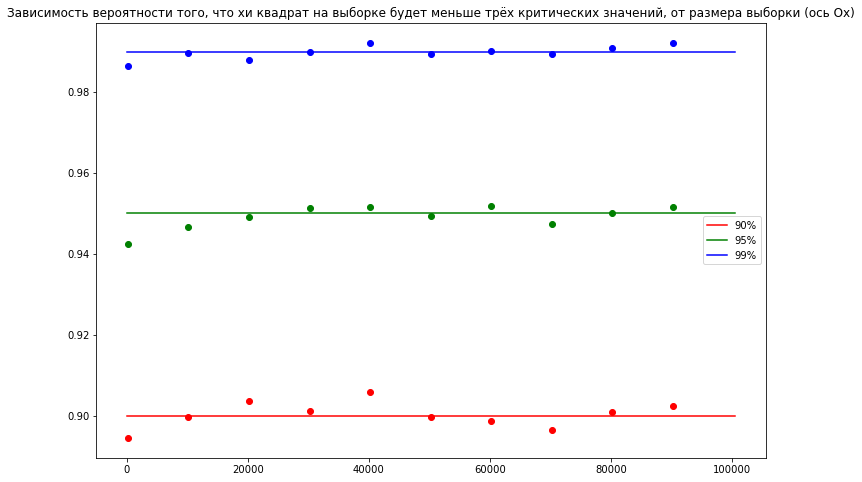

In [9]:
plt.plot([0, 100_500], [0.90, 0.90], color='r', label='90%')
plt.plot([0, 100_500], [0.95, 0.95], color='g', label='95%')
plt.plot([0, 100_500], [0.99, 0.99], color='b', label='99%')

plt.scatter(ns, probs90, color='r')
plt.scatter(ns, probs95, color='g')
plt.scatter(ns, probs99, color='b')

plt.title('Зависимость вероятности того, что хи квадрат на выборке будет меньше трёх критических значений, от размера выборки (ось Ox)')
plt.legend()
plt.show()

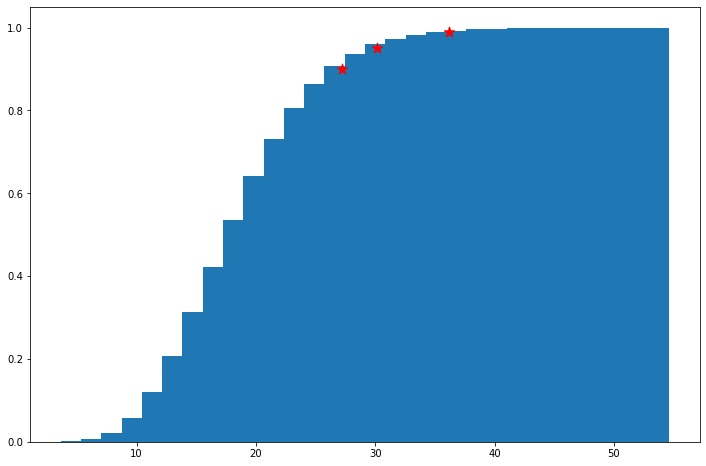

In [19]:
sample_num = 27_000
n = 8_000
m = 20

xis_vs = []
for _ in range(sample_num):
    vs = base.generate_varseries(taskdata.get_y, n)
    xis_vs.append(chi_test.chi_squared(taskdata.y_a, taskdata.y_b, vs, taskdata.Fy_deduced, bincount=m))

plt.hist(xis_vs, bins=30, cumulative=True, density=True, zorder=-1)

plt.scatter([chi_test.chi_critical(0.10, m-1),
             chi_test.chi_critical(0.05, m-1),
             chi_test.chi_critical(0.01, m-1)],
             
            [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

In [ ]:
sample_num = 64_000

xis_vs = [xi_squared_criteria(0, 1, 200, 16, fy_deduced) for _ in range(sample_num)]
plt.hist(xis_vs, bins=40, cumulative=True, density=True, zorder=-1)
plot_histogram_alpha_and_polygon_and_fy(0, 1, )

***

### Критерий согласия Колмогорова

In [15]:
# testing Kolmogorov criteria 20 times:

for _ in range(20):
    kc = kolmogorov_lambda_criteria(0, 1, 30, Fy_deduced)
    print(kc)

0.9139083141982373
0.8710923682740768
0.5710855947255109
0.45982424545161416
0.6851103244872533
0.8795851332305773
0.7464988134294002
0.6537177668126407
1.2455047867810427
0.9952560906726252
0.4935052243559869
0.7318362306216256
0.8203799648601049
0.5678009211516926
1.135534547860588
1.4976439603487524
1.137166258515652
1.0267952459104248
1.1870683771219903
0.48068984509220863


In [17]:
# how often empirical lambda is less than lambda 0.90?

sample_num = 10_000
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_090:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.90 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.95?
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_095:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.95 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.99?
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_099:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.99 in {answer*100}% of cases.')

Observed lambda is less than lambda 0.90 in 90.78% of cases.
Observed lambda is less than lambda 0.95 in 96.04% of cases.
Observed lambda is less than lambda 0.99 in 99.11999999999999% of cases.


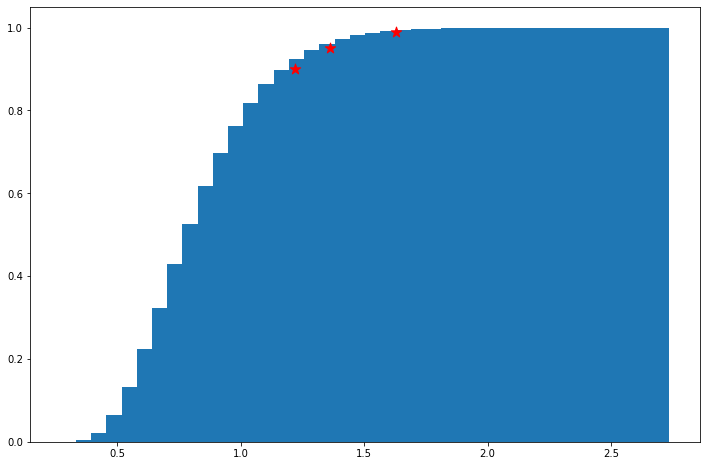

In [18]:
sample_num = 64_000

klambda_vs = [kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced) for _ in range(sample_num)]
plt.hist(klambda_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([klambda_090, klambda_095, klambda_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Мизеса

In [20]:
# testing Mises criteria 20 times:

for _ in range(20):
    mo = mises_omega(0, 1, 30, Fy_deduced)
    print(mo)

0.19283318000914482
0.14984347732162895
0.22539832250237465
0.06677519809240247
0.2418102991239072
0.24085117046764784
0.1130435413286367
0.07058294348267291
0.06871155740887341
0.23535345048210904
0.721374813705875
0.09707864618487495
0.186068645758162
0.049722245228897115
0.3563212327525542
0.06705203609657732
0.07920315881179202
0.32258856308257117
0.5930373378729763
0.11401372325718549


In [22]:
# how often empirical omega is less than omega 0.90?

sample_num = 10_000
answer = 0
for _ in range(sample_num):
    momega = mises_omega(0, 1, 200, Fy_deduced)
    if momega < momega_090:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.90 in {answer*100}% of cases.')

# how often empirical omega is less than omega 0.95?
answer = 0
for _ in range(sample_num):
    momega = mises_omega(0, 1, 200, Fy_deduced)
    if momega < momega_095:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.95 in {answer*100}% of cases.')

# how often empirical omega is less than omega 0.99?
answer = 0
for _ in range(sample_num):
    momega = mises_omega(0, 1, 200, Fy_deduced)
    if momega < momega_099:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.99 in {answer*100}% of cases.')

Observed omega is less than omega 0.90 in 89.11% of cases.
Observed omega is less than omega 0.95 in 94.19% of cases.
Observed omega is less than omega 0.99 in 98.88% of cases.


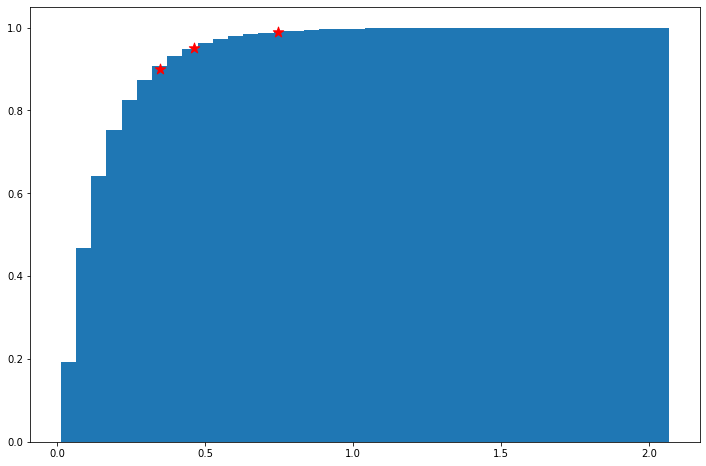

In [23]:
sample_num = 64_000

momega_vs = [mises_omega(0, 1, 200, Fy_deduced) for _ in range(sample_num)]
plt.hist(momega_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([momega_090, momega_095, momega_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()